In [2]:
from sympy import *
init_printing()

Define time variable

In [3]:
t = Symbol('t')

Define parameter symbols

In [4]:
# limb lengths
l_1, l_2 = symbols('l_1, l_2')

# limb masses
m_1, m_2 = symbols('m_1, m_2')

# body mass
m_A = symbols('m_A')

# gravity
g = symbols('g')

# joint stiffnesses
k_B = symbols('k_B')

# joint damping
b_B = symbols('b_B')

# joint neutral angles
psi_B = symbols('psi_B')

# Walking speed
v = symbols('v')

# Swing phase hip height
y_A_SW = Function('y_ASW')(t)

Define coordinate symbols

In [5]:
# limb orientations
theta_1 = Function('theta_1')(t)
theta_2 = Function('theta_2')(t)

# hip height
y = Function('y')(t)

Calculate positions

In [6]:
# rates of change
omega_1 = diff(theta_1)
omega_2 = diff(theta_2)

# joint positions
x_A = 0
y_A = y
x_B = x_A + l_1 * sin(theta_1)
y_B = y_A - l_1 * cos(theta_1)
x_C = x_B + l_2 * sin(theta_2)
y_C = y_B - l_2 * cos(theta_2)

# joint velocities
u_A = diff(x_A, t)
v_A = diff(y_A, t)
u_B = diff(x_B, t)
v_B = diff(y_B, t)
u_C = diff(x_C, t)
v_C = diff(y_C, t)

# Centers of masses
x_1 = x_A + l_1 * sin(theta_1) / 2
y_1 = y_A - l_1 * cos(theta_1) / 2
x_2 = x_B + l_2 * sin(theta_2) / 2
y_2 = y_B - l_2 * cos(theta_2) / 2

# COM velocities
u_1 = diff(x_1, t)
v_1 = diff(y_1, t)
u_2 = diff(x_2, t)
v_2 = diff(y_2, t)

In [7]:
# Moments of inertia
I_1 = m_1 * l_1**2 / 12
I_2 = m_2 * l_2**2 / 12

Calculate Lagrangian

In [8]:
# Kinetic Energy
T = m_1 * (u_1**2 + v_1**2) / 2 + m_2 * (u_2**2 + v_2**2) / 2 + I_1 * omega_1**2 / 2 + I_2 * omega_2**2 / 2 

# Potential Energy
V = k_B * (theta_1 - theta_2 - psi_B)**2 / 2

# Content
D = b_B * (omega_1 - omega_2)**2 / 2

Constraint Equations

In [9]:
# Swing
const_SW_y_A = y_A - y_A_SW

# Foot Planted
const_FP_y_C = y_C
const_FP_u_C = u_C + v

For only 2 free coordinates ($y$ and $\theta_2$) there are too many constraints in the foot planted stage.

We may need to make the angle $\theta_1$ a free coordinate in the foot planted stage

We could even make $\theta_1$ free in both stages and let the driving force come from the constant forward motion $v$

Solve constraints for variables

In [10]:
# Swing
solve(const_SW_y_A, y)[0]
Eq(y, y_A_SW)

In [11]:
# Foot Planted 1: y
y_FP = solve(const_FP_y_C, y)[0]
Eq(y, y_FP)

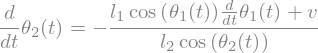

In [12]:
# Foot planted 2: omega_2
omega_2FP = solve(const_FP_u_C.subs(y, y_FP), omega_2)[0]

Eq(omega_2, omega_2FP)

Calculate constrained Lagrangian

In [13]:
T_SW = T.subs(y, y_A_SW)
D_SW = D.subs(y, y_A_SW)
V_SW = V.subs(y, y_A_SW)

Virtual Work

In [14]:
dw_A = -g * m_A * diff(y_A, t)

In [15]:
dw_1 = -g * m_1 * diff(y_1, t)

In [16]:
dw_2 = -g * m_2 * diff(y_2, t)

In [18]:
dw = simplify(dw_A + dw_1 + dw_2)

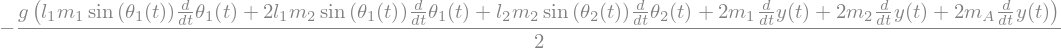

In [19]:
dw.collect(diff(theta_2, t))

In [20]:
print(dw.collect(diff(theta_2, t)))

-g*(l_1*m_1*sin(theta_1(t))*Derivative(theta_1(t), t) + 2*l_1*m_2*sin(theta_1(t))*Derivative(theta_1(t), t) + l_2*m_2*sin(theta_2(t))*Derivative(theta_2(t), t) + 2*m_1*Derivative(y(t), t) + 2*m_2*Derivative(y(t), t) + 2*m_A*Derivative(y(t), t))/2


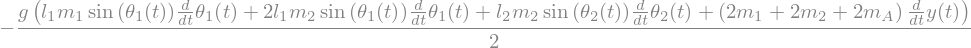

In [21]:
dw.collect(diff(y, t))

In [22]:
print(dw.collect(diff(y, t)))

-g*(l_1*m_1*sin(theta_1(t))*Derivative(theta_1(t), t) + 2*l_1*m_2*sin(theta_1(t))*Derivative(theta_1(t), t) + l_2*m_2*sin(theta_2(t))*Derivative(theta_2(t), t) + (2*m_1 + 2*m_2 + 2*m_A)*Derivative(y(t), t))/2


Extract applied efforts

In [23]:
e_y = simplify(-g *(2*m_1 + 2*m_2 + 2*m_A)/2)
e_y

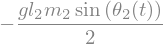

In [25]:
e_2 = simplify(-g * l_2*m_2*sin(theta_2)/2)
e_2

Equations of Motion (no efforts or constraints)

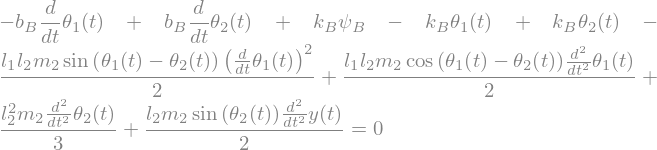

In [ ]:
# theta_2
EOM_2 = simplify(diff(diff(T, omega_2), t) - diff(T, theta_2) + diff(D, omega_2) + diff(V, theta_2))
Eq(EOM_2, 0)

Calculate Constrained Equations of Motion

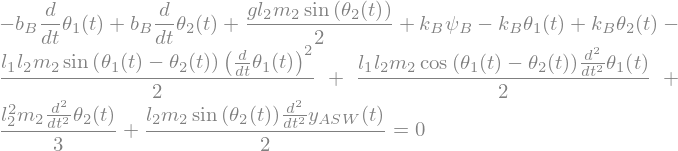

In [26]:
# Swing
EOM_2_SW = simplify(diff(diff(T_SW, omega_2), t) - diff(T_SW, theta_2) + diff(D_SW, omega_2) + diff(V_SW, theta_2) - e_2)
Eq(EOM_2_SW, 0)

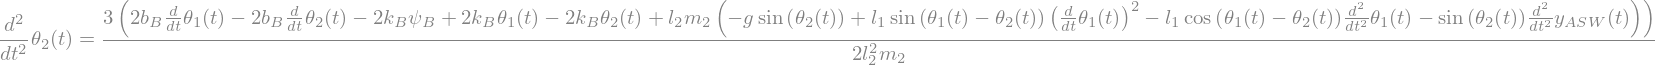

In [27]:
# Solve for derivative of omega_2
alpha_2_SW = solve(EOM_2_SW, diff(omega_2, t))[0]
Eq(diff(omega_2, t), alpha_2_SW)

Final differential Equations

Swing Phase

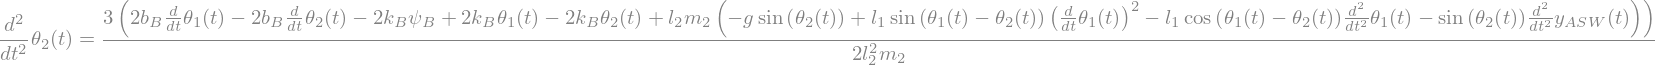

In [28]:
Eq(diff(omega_2), alpha_2_SW)

Foot Planted Phase

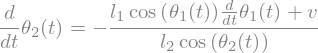

In [29]:
Eq(omega_2, omega_2FP)

In [30]:
Eq(y, y_FP)